# Prerequisites

In [3]:
!pip install gensim nltk scikit-learn seaborn transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: fsspec
    Found existing i

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel

# Logistic Regression

Label distribution after cleaning:
label
0    58
1    26
Name: count, dtype: int64


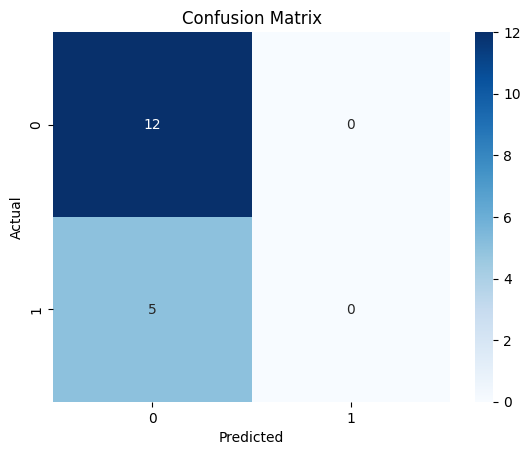

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.00      0.00      0.00         5

    accuracy                           0.71        17
   macro avg       0.35      0.50      0.41        17
weighted avg       0.50      0.71      0.58        17



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


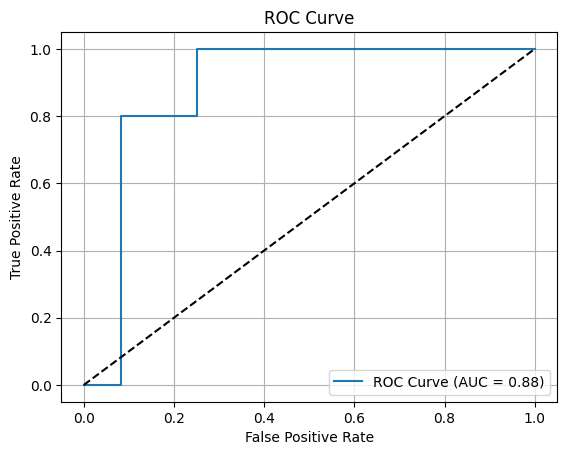

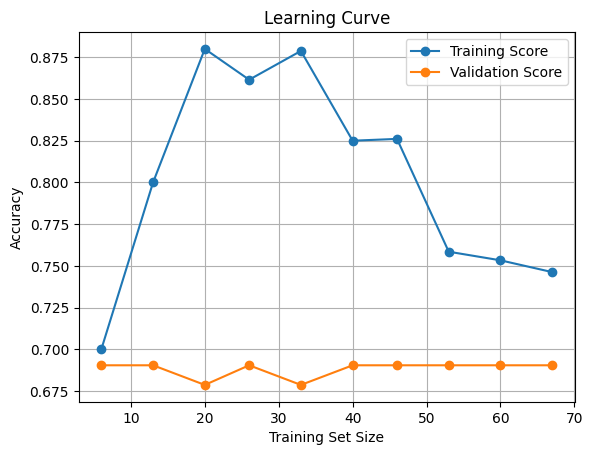

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.00      0.00      0.00         5

    accuracy                           0.71        17
   macro avg       0.35      0.50      0.41        17
weighted avg       0.50      0.71      0.58        17



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
# 1. Load the dataset
df = pd.read_csv("email_spam.csv")  # Replace with your path to the file

# 2. Normalize the 'type' column (not spam = ham)
df['type'] = df['type'].replace({'not spam': 'ham'})  # Replacing 'not spam' with 'ham'

# 3. Encode 'type' to binary: ham = 0, spam = 1
df['label'] = df['type'].map({'ham': 0, 'spam': 1})

# 4. Combine 'title' and 'text' into a single content column
df['content'] = df['title'] + " " + df['text']

# 5. Drop rows with missing 'title' or 'text'
df.dropna(subset=['title', 'text'], inplace=True)

# 6. Check the class distribution
print("Label distribution after cleaning:")
print(df['label'].value_counts())

# 7. Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['content'])
y = df['label']

# 8. Split the data (stratified split to handle class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 9. Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 10. Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 12. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 13. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# 14. Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

# SVM Model

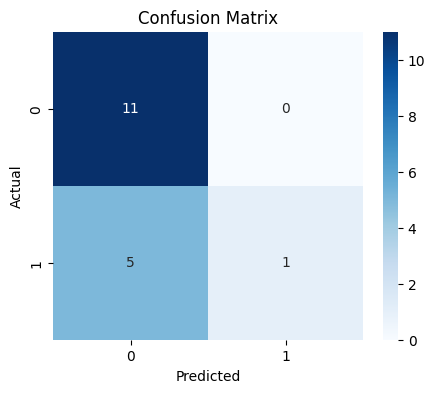

Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.17      0.29         6

    accuracy                           0.71        17
   macro avg       0.84      0.58      0.55        17
weighted avg       0.80      0.71      0.63        17



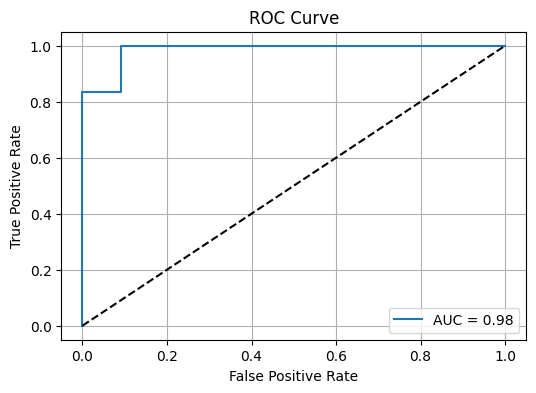

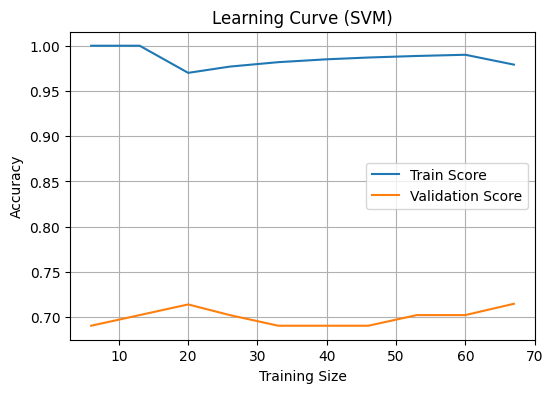

In [5]:
# 1. Load data
df = pd.read_csv("email_spam.csv")

# 2. Rename column
df.rename(columns={'type': 'label'}, inplace=True)

# 3. Drop missing values
df.dropna(inplace=True)

# 4. Encode labels
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})

# 5. Combine 'title' and 'text'
df['combined_text'] = df['title'] + " " + df['text']

# 6. TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['combined_text'])
y = df['label']

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train SVM
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# 9. Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 12. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# 13. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=0
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, label="Train Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.title("Learning Curve (SVM)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


# Random forest Model

Label distribution after cleaning:
label
0    58
1    26
Name: count, dtype: int64


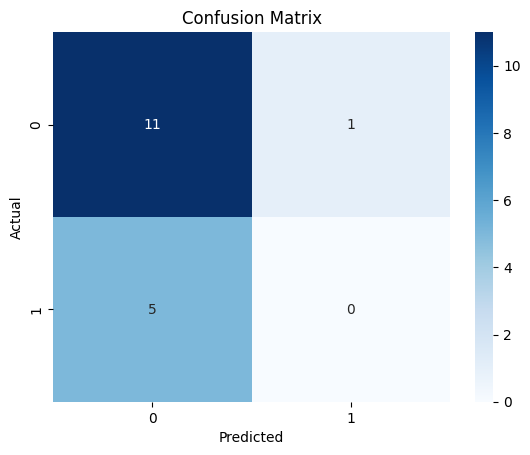

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.00      0.00      0.00         5

    accuracy                           0.65        17
   macro avg       0.34      0.46      0.39        17
weighted avg       0.49      0.65      0.55        17



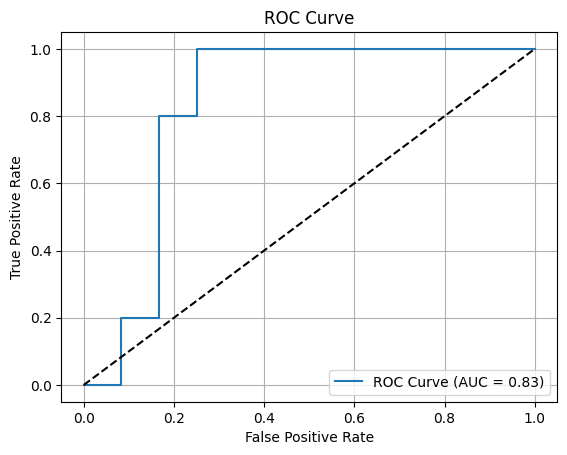

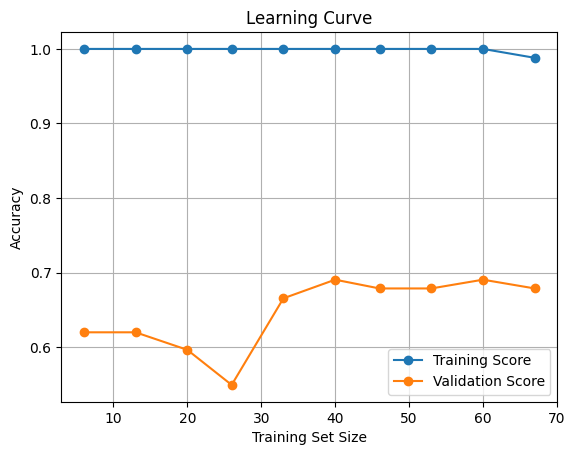

In [6]:
# 1. Load the dataset
df = pd.read_csv("email_spam.csv")  # Replace with your path to the file

# 2. Normalize the 'type' column (not spam = ham)
df['type'] = df['type'].replace({'not spam': 'ham'})  # Replacing 'not spam' with 'ham'

# 3. Encode 'type' to binary: ham = 0, spam = 1
df['label'] = df['type'].map({'ham': 0, 'spam': 1})

# 4. Combine 'title' and 'text' into a single content column
df['content'] = df['title'] + " " + df['text']

# 5. Drop rows with missing 'title' or 'text'
df.dropna(subset=['title', 'text'], inplace=True)

# 6. Check the class distribution
print("Label distribution after cleaning:")
print(df['label'].value_counts())

# 7. Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['content'])
y = df['label']

# 8. Split the data (stratified split to handle class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 9. Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 10. Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 12. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 13. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# 14. Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


# Word2Vec - LSTM

Label distribution after cleaning:
label
0    58
1    26
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       299,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,800 (1.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 299,800 (1.14 MB)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5452 - loss: 0.6923 - val_accuracy: 0.7059 - val_loss: 0.6823
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - accuracy: 0.6921 - loss: 0.6841 - val_accuracy: 0.7059 - val_loss: 0.6748
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 0.6921 - loss: 0.6765 - val_accuracy: 0.7059 - val_loss: 0.6708
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 785ms/step - accuracy: 0.6869 - loss: 0.6749 - val_accuracy: 0.7059 - val_loss: 0.6659
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - accuracy: 0.6817 - loss: 0.6712 - val_accuracy: 0.7059 - val_loss: 0.6541
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


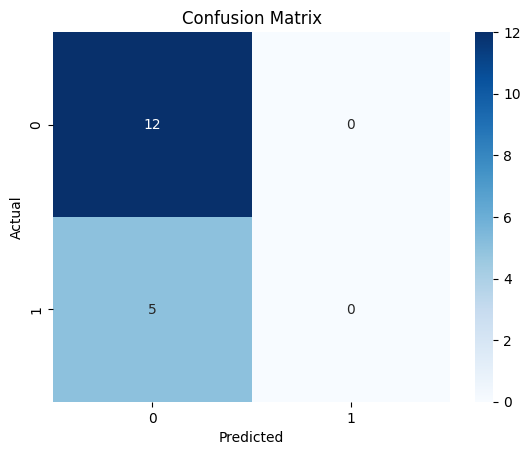

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.00      0.00      0.00         5

    accuracy                           0.71        17
   macro avg       0.35      0.50      0.41        17
weighted avg       0.50      0.71      0.58        17

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


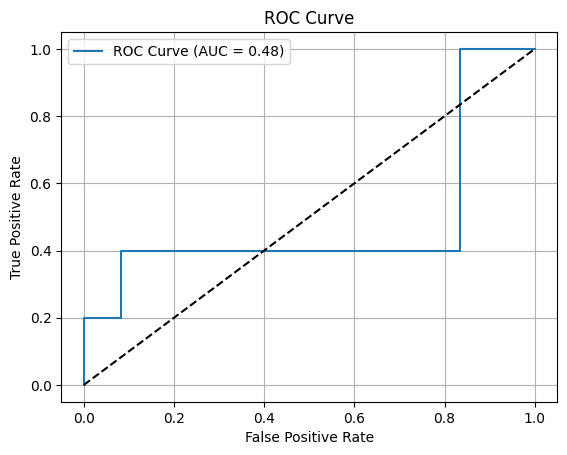

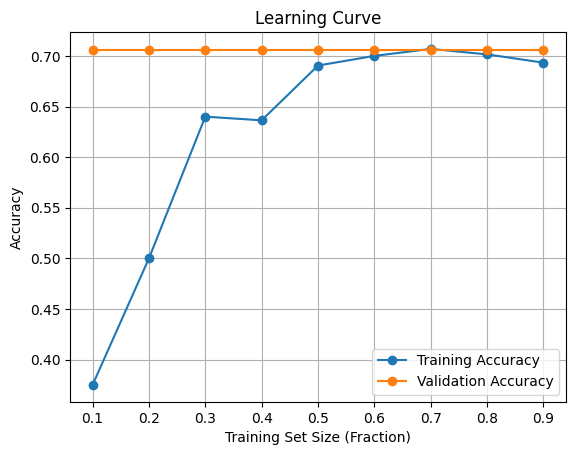

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


# 1. Load the dataset
df = pd.read_csv("email_spam.csv")  # Replace with your path to the file

# 2. Normalize the 'type' column (not spam = ham)
df['type'] = df['type'].replace({'not spam': 'ham'})  # Replacing 'not spam' with 'ham'

# 3. Encode 'type' to binary: ham = 0, spam = 1
df['label'] = df['type'].map({'ham': 0, 'spam': 1})

# 4. Combine 'title' and 'text' into a single content column
df['content'] = df['title'] + " " + df['text']

# 5. Drop rows with missing 'title' or 'text'
df.dropna(subset=['title', 'text'], inplace=True)

# 6. Check the class distribution
print("Label distribution after cleaning:")
print(df['label'].value_counts())

# 7. Preprocessing: Tokenization and padding
# Tokenizing text data
tokenizer = Tokenizer(num_words=5000, lower=True, split=' ')
tokenizer.fit_on_texts(df['content'])
X = tokenizer.texts_to_sequences(df['content'])
X = pad_sequences(X, maxlen=200)

y = df['label']

# 8. Word2Vec: Train a Word2Vec model
sentences = [text.split() for text in df['content']]  # Tokenized sentences
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# 9. Prepare Word2Vec embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = w2v_model.wv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        continue

# 10. Split the data (stratified split to handle class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 11. Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=200,
                    trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

# 12. Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

# 13. Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# 14. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 15. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 16. ROC Curve
y_pred_proba = model.predict(X_test)  # Get probabilities
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Use the probabilities in the ROC calculation
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# 17. Learning Curve
train_sizes = np.linspace(0.1, 0.9, 9)  # 10% to 90%

train_scores = []
val_scores = []

for train_size in train_sizes:
    # Split based on current training size
    X_train_temp, _, y_train_temp, _ = train_test_split(X, y, train_size=train_size, random_state=42)

    # Fit model for 1 epoch (for quick learning curve estimation)
    history_temp = model.fit(X_train_temp, y_train_temp,
                             epochs=1, batch_size=64,
                             validation_data=(X_test, y_test),
                             verbose=0)

    train_scores.append(history_temp.history['accuracy'][-1])
    val_scores.append(history_temp.history['val_accuracy'][-1])

# Plotting
plt.figure()
plt.plot(train_sizes, train_scores, 'o-', label="Training Accuracy")
plt.plot(train_sizes, val_scores, 'o-', label="Validation Accuracy")
plt.title("Learning Curve")
plt.xlabel("Training Set Size (Fraction)")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

# BERT - LSTM

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1 | Loss: 3.6270 | Val Acc: 0.3529
Epoch 2 | Loss: 3.5346 | Val Acc: 0.3529
Epoch 3 | Loss: 3.5035 | Val Acc: 0.2941


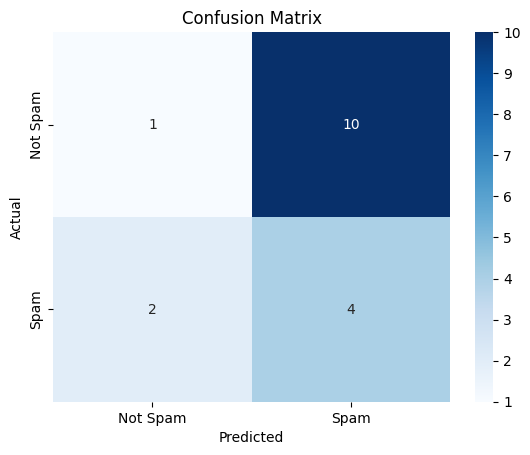

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.29      0.67      0.40         6

    accuracy                           0.29        17
   macro avg       0.31      0.38      0.27        17
weighted avg       0.32      0.29      0.23        17



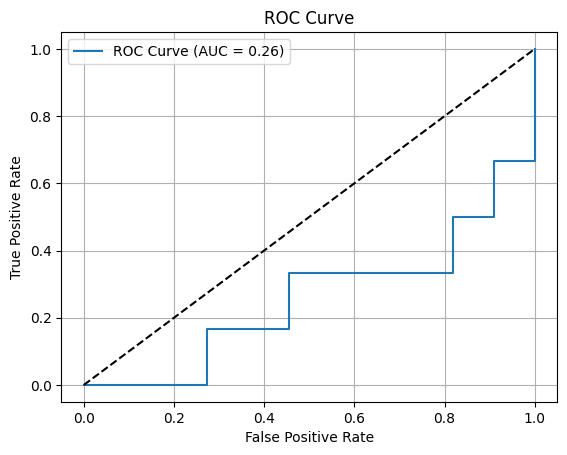

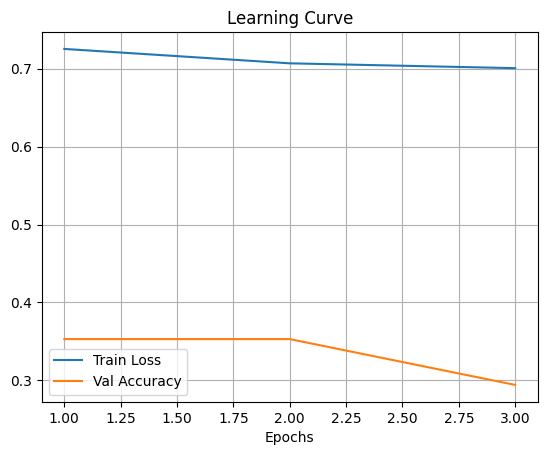

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from transformers import BertTokenizer, BertModel

# 1. Load and prepare data
df = pd.read_csv("email_spam.csv")
df = df[['text', 'type']].dropna()
df['label'] = df['type'].map({'spam': 1, 'not spam': 0})
df = df.drop(columns=['type'])

# 2. Tokenizer & Dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class EmailDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.encodings = tokenizer(texts, padding=True, truncation=True, max_length=max_len, return_tensors="pt")
        self.labels = torch.tensor(labels.values)

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}, self.labels[idx]

    def __len__(self):
        return len(self.labels)

# 3. Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

train_dataset = EmailDataset(X_train.tolist(), y_train, tokenizer)
test_dataset = EmailDataset(X_test.tolist(), y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# 4. Define BERT + LSTM Model
class BERT_LSTM(nn.Module):
    def __init__(self, hidden_dim=128):
        super(BERT_LSTM, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.lstm = nn.LSTM(768, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
        lstm_out, _ = self.lstm(bert_output)
        out = self.fc(lstm_out[:, -1, :])
        return self.sigmoid(out).squeeze()

# 5. Training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BERT_LSTM().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

train_losses = []
val_accuracies = []

for epoch in range(3):
    model.train()
    epoch_loss = 0
    for batch, labels in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Validation accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch, labels in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = labels.to(device)
            outputs = model(input_ids, attention_mask)
            preds = (outputs > 0.5).long()
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    val_accuracies.append(correct / total)
    print(f"Epoch {epoch+1} | Loss: {epoch_loss:.4f} | Val Acc: {correct / total:.4f}")

# 6. Evaluation
model.eval()
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for batch, labels in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask)
        probs = outputs.cpu().numpy().flatten()
        preds = (probs > 0.5).astype(int)

        all_preds.extend(preds.tolist())
        all_probs.extend(probs.tolist())
        all_labels.extend(labels.cpu().numpy().tolist())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(all_labels, all_preds))

# ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_probs)
auc = roc_auc_score(all_labels, all_probs)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Learning Curve
plt.figure()
plt.plot(range(1, len(train_losses)+1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, label="Val Accuracy")
plt.xlabel("Epochs")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

# Data Visualization

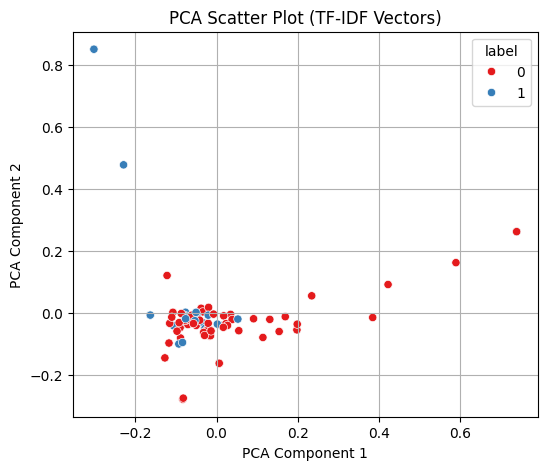

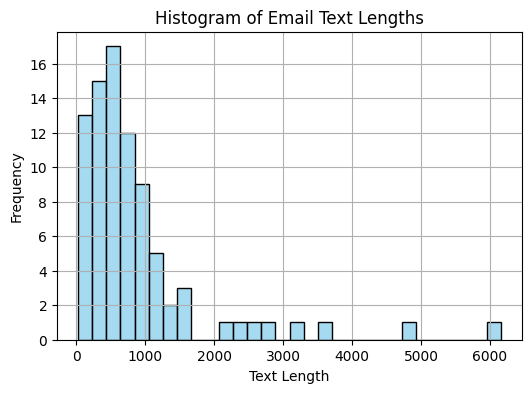

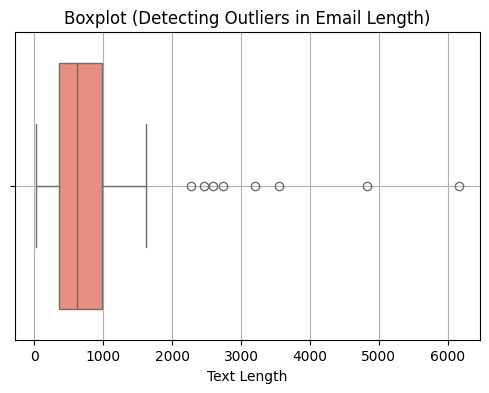

<ipython-input-17-61972612e040>:58: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 0]['tfidf_mean'], label="Not Spam", shade=True)
<ipython-input-17-61972612e040>:59: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 1]['tfidf_mean'], label="Spam", shade=True)


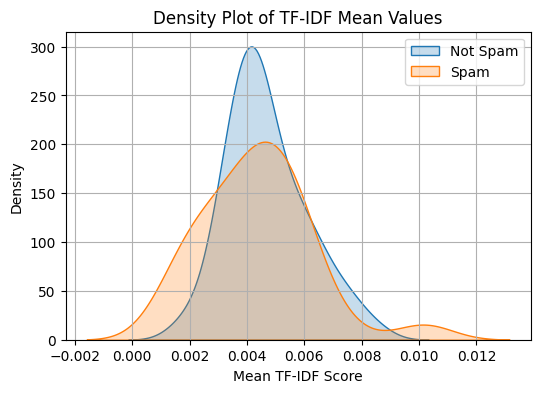

Skewness of Email Text Lengths: 3.0372


<ipython-input-17-61972612e040>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="coolwarm")


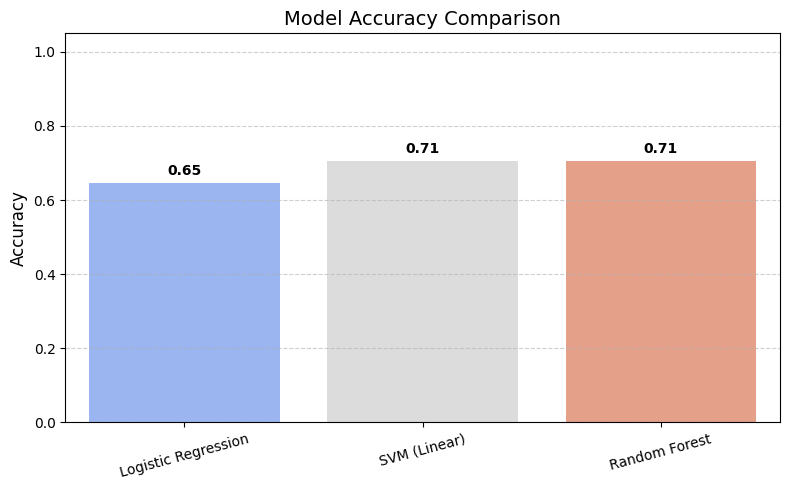

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load and clean data
df = pd.read_csv("email_spam.csv")
df.rename(columns={'type': 'label'}, inplace=True)
df.dropna(inplace=True)
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})
df['combined_text'] = df['title'] + " " + df['text']
df['text_length'] = df['combined_text'].apply(len)

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['combined_text'])
y = df['label']

# 1. Scatter Plot with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title("PCA Scatter Plot (TF-IDF Vectors)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()

# 2. Histogram of Email Lengths
plt.figure(figsize=(6, 4))
sns.histplot(df['text_length'], bins=30, kde=False, color='skyblue')
plt.title("Histogram of Email Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 3. Boxplot for Outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['text_length'], color='salmon')
plt.title("Boxplot (Detecting Outliers in Email Length)")
plt.xlabel("Text Length")
plt.grid()
plt.show()

# 4. Density Plot of TF-IDF Means
df['tfidf_mean'] = X.mean(axis=1).A1
plt.figure(figsize=(6, 4))
sns.kdeplot(df[df['label'] == 0]['tfidf_mean'], label="Not Spam", shade=True)
sns.kdeplot(df[df['label'] == 1]['tfidf_mean'], label="Spam", shade=True)
plt.title("Density Plot of TF-IDF Mean Values")
plt.xlabel("Mean TF-IDF Score")
plt.legend()
plt.grid()
plt.show()

# 5. Skewness
from scipy.stats import skew
skew_val = skew(df['text_length'])
print(f"Skewness of Email Text Lengths: {skew_val:.4f}")

# 6. Model Comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[name] = acc

# Plot model comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    scores[name] = acc

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="coolwarm")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.05)

# Add accuracy text labels above bars
for i, (model_name, acc) in enumerate(scores.items()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()